#[K-means 알고리즘](https://)



---



#[K-means 알고리즘이란?](https://)
- 머신러닝 비지도학습에 속하며 [데이터를 K개의 군집(Cluster)으로 묶는(Clusting) 알고리즘](https://)
>- [K는 묶을 군집(클러스터)의 개수를 의미하고 means는 평균을 의미](https://)
>>- 군집의 평균(mean)을 활용하여 K개의 군집으로 묶는다는 의미
>>- 여기서 평균(Means)이란 [각 클러스터의 중심과 데이터들의 평균 거리를 의미](https://)



---



#[K-means vs K-NN](https://)
- K-means 알고리즘은 K-NN 알고리즘과 유사하면서도 다름
>- 둘은 모두 K개의 점을 지정하여 거리를 기반으로 구현되는 거리기반 분석 알고리즘임
>- [지도학습에 속하는 K-NN 알고리즘과 달리 K-means 알고리즘은 비지도학습 방법에 속함](https://)
>- 따라서 K-means 알고리즘의 목적을 [분류(Classification)라고 하지 않고 군집화(Clustering)라고 함](https://)
>>- 즉,[K-NN은 분류 알고리즘, K-means은 군집화 알고리즘이라고 할 수 있음](https://)

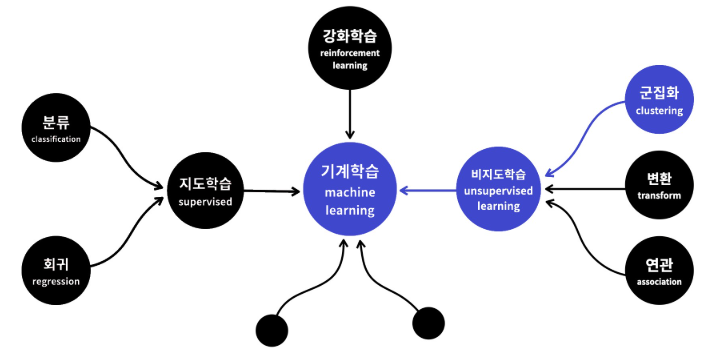



---



#[K-means 알고리즘 원리 이해하기](https://)

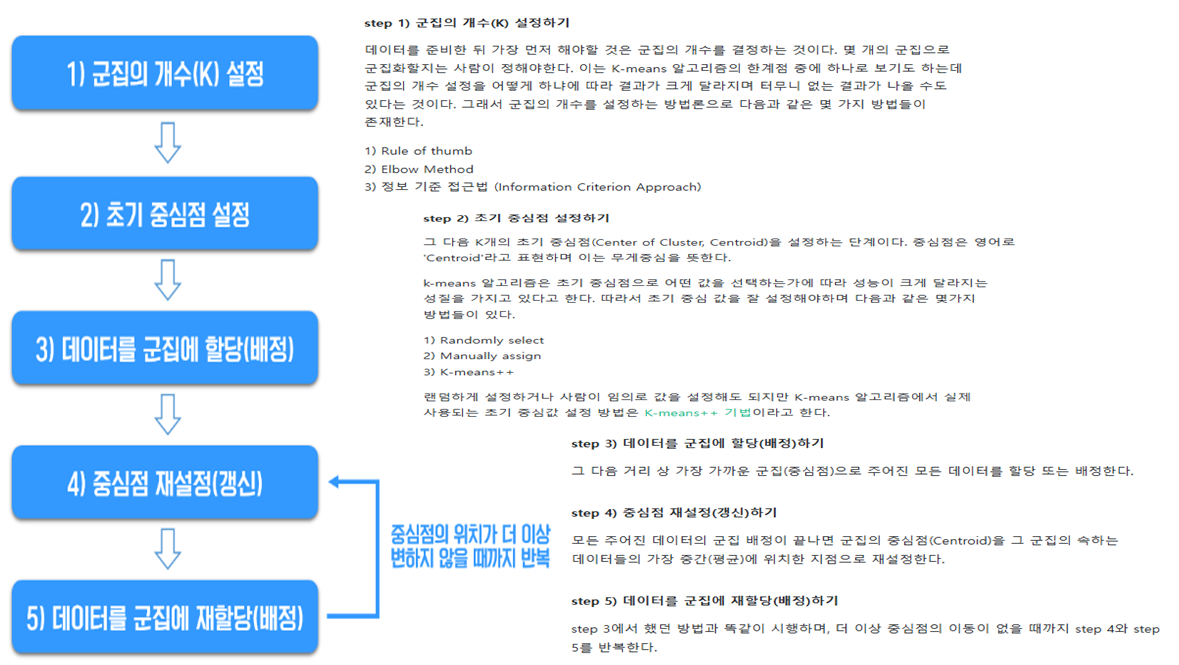



---



#[K-means 알고리즘 원리 확인하기](https://)

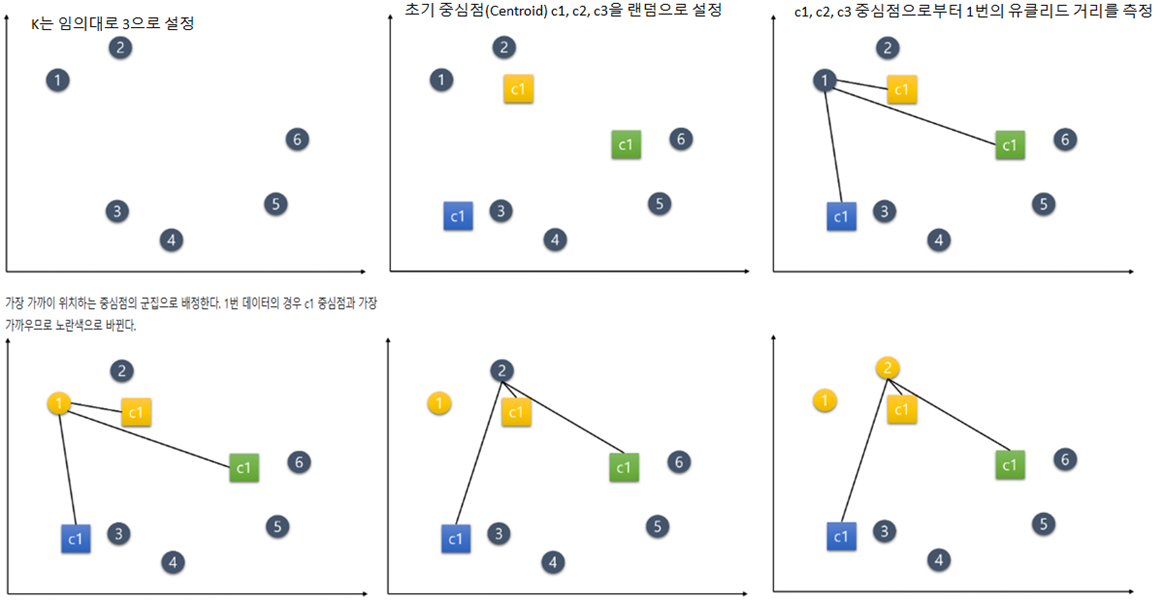

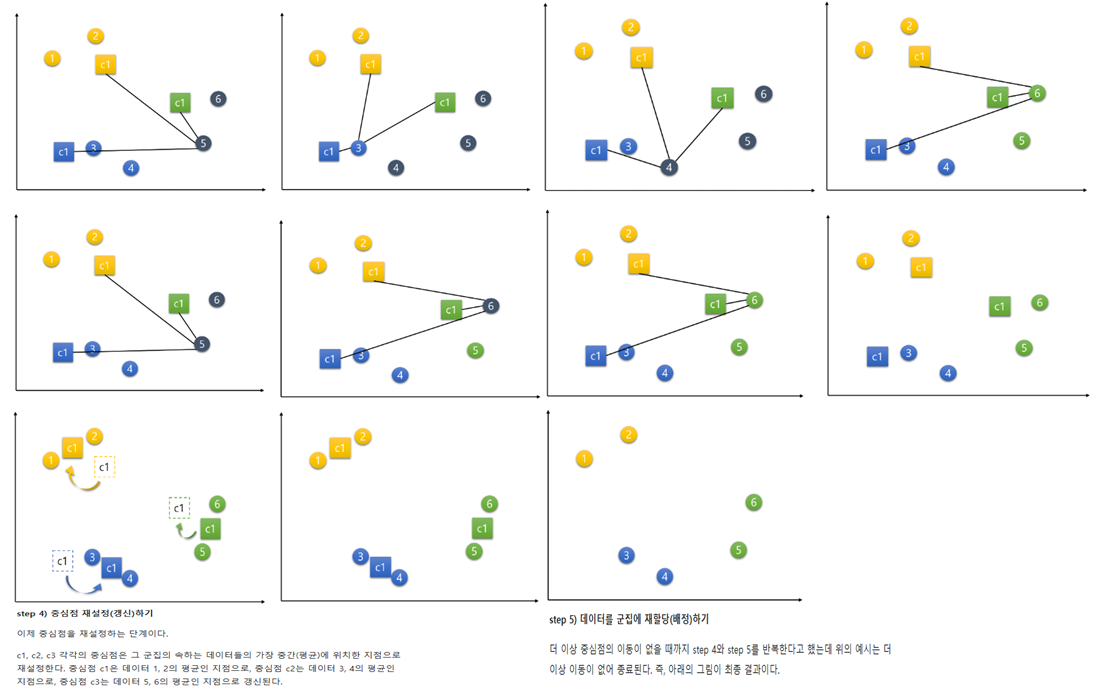



---



#[실습 예](https://)


#[데이터 준비](https://)

In [1]:
#데이터 준비
#sklearn에서 제공해주는 iris 데이터를 사용한다.
#clustering이기에 종속변수를 제외하고 독립변수만으로 데이터프레임을 구성한다.
import pandas as pd
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns = iris.feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [2]:
#clustering에서는 각 독립변수(컬럼)별로 값의 스케일이 다르면 가지게되는 가중치가 달라진다.
#(독립변수 x1이 1000~10000의 값을 가지고 독립변수 x2가 1~3의 스케일을 가질경우 x1의 변화에 따라서 모델이 좌우되고 x2의 변화는 무시된다.)
#따라서 스케일링을 통해서 모든 독립변수간의 스케일을 동일하게 맞추어준다.
#스케일링이란 피처 스케일링(feature scaling)을 의미한다.
#피처 스케일링이란, 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 말한다.
#그러니까 쉽게 이야기하면, 서로 다른 단위를 가지고 있는 데이터를 분석하기 위해서 단위를 일정하게 맞춘다고 생각하면 된다.
#대표적인 방법으로 표준화와 정규화가 있다.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.loc[:,:] = scaler.fit_transform(df)

print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 rows x 4 columns]




---



#[K-means 생성 및 학습](https://)


In [4]:
#K-means 생성 및 학습
#sklearn의 모든 모델들과 같이 .fit명령어로 학습한다.
#clustering은 비지도 학습이므로 독립변수만을 입력으로 받는다.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=7)

kmeans.fit(df)


KMeans(n_clusters=3, random_state=7)

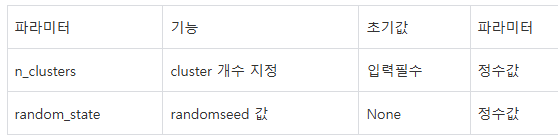

In [5]:
print(kmeans.labels_)#분류 결과는 .labels_로 확인가능하다.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1]


In [6]:
#새로운 데이터를 학습한 클러스터에 사용할때는 .transform 명령어를 사용한다.
#이때 반환되는 값은 주어진 데이터의 값들이 각 cluster와의 거리값이다.
#별도의 테스트 데이터를 준비하지 않았기때문에 다시한번 데이터프레임을 넣어본다.

distance_df = pd.DataFrame(kmeans.transform(df), columns=["c0", "c1", "c2"])
print(distance_df)


           c0        c1        c2
0    0.166919  3.901050  3.047316
1    1.050080  3.899691  2.537657
2    0.702231  4.082755  2.853419
3    0.954610  4.081073  2.746230
4    0.350534  4.027521  3.232372
..        ...       ...       ...
145  4.130819  0.511182  2.024122
146  3.999331  1.396946  1.172155
147  3.762053  0.312549  1.649638
148  3.793439  1.096007  2.353423
149  3.268404  1.007953  1.180856

[150 rows x 3 columns]


In [7]:
#각 cluster의 중앙값은 .cluster_centers_ 명령어로 확인할 수 있다.
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
print(centroids)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -1.002067          0.906255          -1.303108         -1.256344   
1           1.033599          0.006139           0.943605          0.972562   
2          -0.168406         -0.972698           0.259871          0.175433   

     cluster  
0  Cluster 0  
1  Cluster 1  
2  Cluster 2  


In [8]:
#cluster 중심과의 거리 제곱합은 .inertia_ 명령어로 제공된다.
print(kmeans.inertia_)

140.90153181202444




---



#[타당성 평가(성능 평가)](https://)
- Clustering은 정답이 없는 [비지도학습이기에 모델의 타당성(또는 성능)을 평가하기위해서 거리값을 사용함](https://)
- 또한, cluster 개수별로 타당성을 비교해서 [최적의 cluster 개수를 구하는데 사용함](https://)



---



#[Elbow method(엘보우 기법)](https://)
- [군집 내 오차제곱합(SSE, sum of squared error)의 합을 군집화의 비용함수로 정의](https://)
- [군집 수가 늘어날수록 비용함수는 감소함](https://)
- 이때, 비용함수 감소 기울기가 [급격히 줄어드는 부분(더이상 군집을 늘려도 크게 비용이 감소하지 않는 부분)을](https://) 최적의 군집수로 판단함
- KElbowVisualizer 라이브러리를 활용하여 손쉽게 계산 및 시각화를 할 수 있음



---



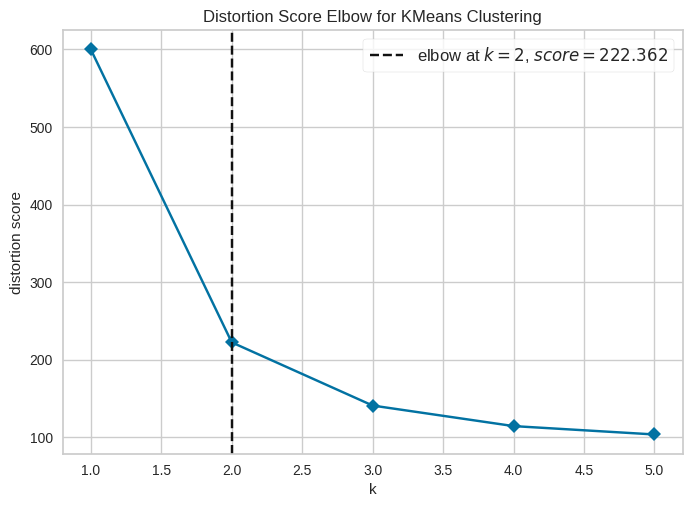

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer

k=0
kmeans = KMeans(n_clusters=k, random_state=7)
visualizer = KElbowVisualizer(kmeans, k=(1,6), timings=False)
visualizer.fit(df)
visualizer.show()
#결과 - 군집수 2개가 가장 최상의 군집 개수라고 추천하고 있다.




---



#[Silhouette Index(실루엣 인덱스)](https://)
- clustering 기법에서 실질적으로 가장 많이 쓰이는 타당성(평가) 지표
- 개별 객체마다 silhouette index 값을 구할수 있으며, 이에 대한 평균값을 사용함
- 모든 값이 0.5 이상을 가지면 유의하다고 판단함
    - [a(i) : 객체 i와 객체 i가 속한 cluster 내 다른 객체들간의 거리 평균](https://)
    - [b(i) : 객체 i와 다른 군집에 속한 객체들간의 거리평균 중, 가장 최소값을 가지는 군집과의 거리 평균](https://)


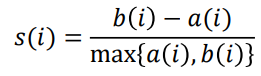



---



In [10]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_avg = silhouette_score(df, kmeans.labels_)
print(silhouette_avg)


0.39282439879083825


In [11]:
#cluster 개수별로 silhouette index를 계산하여서 가장높은 값을 가지는 cluster 수를 최적의 값으로 본다.
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=7).fit(df)
    silhouette_avg = silhouette_score(df, kmeans.labels_)
    print(f'cluster : {k} // silhouette index {silhouette_avg}')
#결과에서는 cluster 2개에서 가장 높은 index 값을 가졌으므로 2가 가장 유의한 cluster 개수라고 할 수 있다.


cluster : 2 // silhouette index 0.5817500491982808
cluster : 3 // silhouette index 0.4565352255831263
cluster : 4 // silhouette index 0.4188923398171004
cluster : 5 // silhouette index 0.39282439879083825


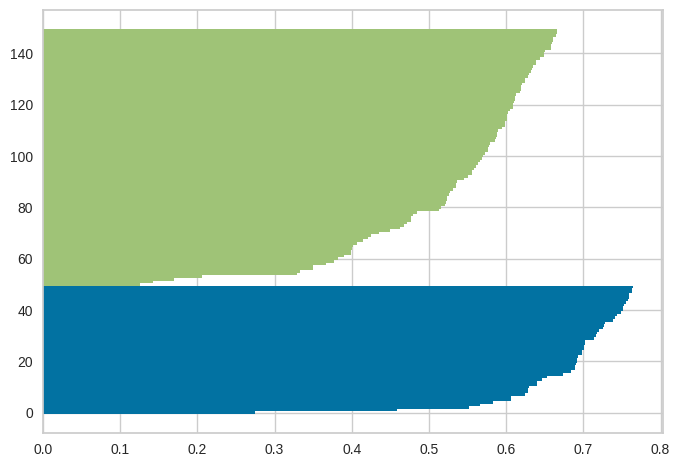

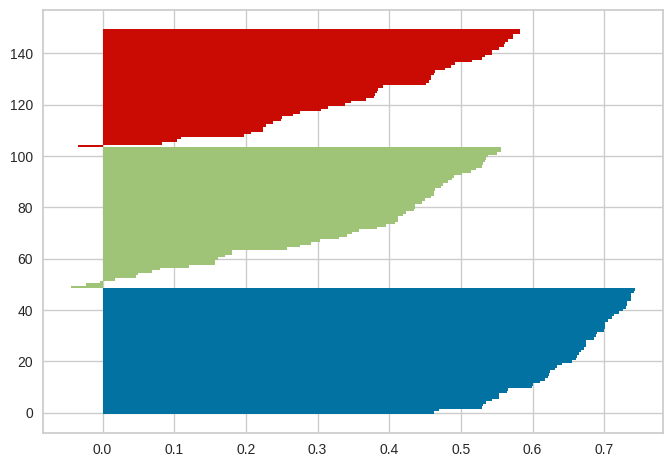

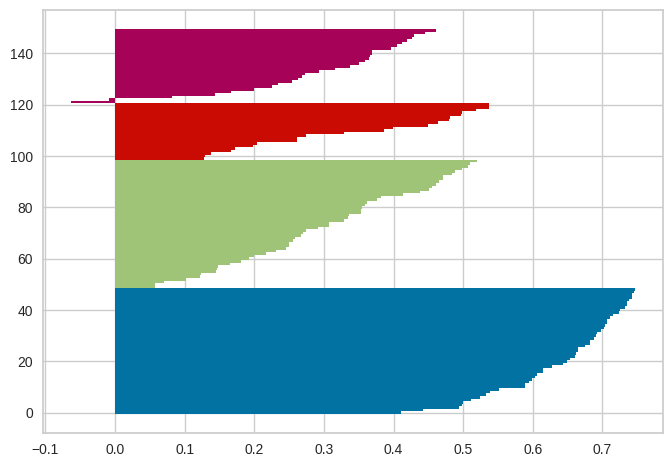

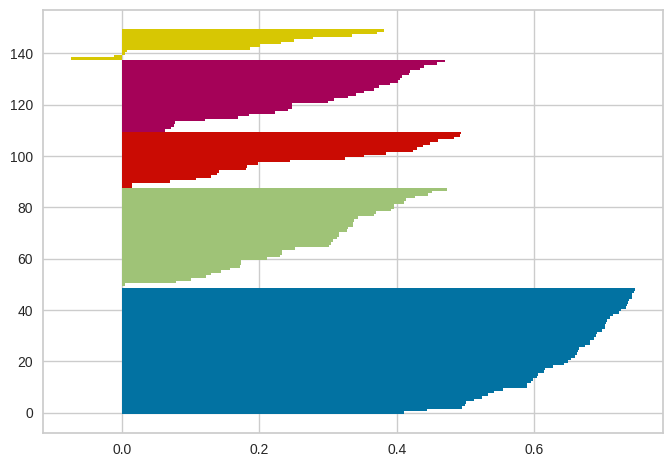

In [12]:
import matplotlib.pyplot as plt
import numpy as np

for k in range(2, 6):
    fig, ax = plt.subplots(1, 1)
    kmeans = KMeans(n_clusters=k, random_state=7).fit(df)
    silhouette_vals = silhouette_samples(df, kmeans.labels_)
    y_ticks = []
    y_lower = y_upper = 0
    for c_num in np.unique(kmeans.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort() # numpy array는 sort 메소드를 이용하면 오름차순으로 정렬된 형태로 바뀜

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        y_lower += len(cluster_silhouette_vals)

#0.5 이하의 값들이 존재하므로 해당 clustering은 유의하지 않다고 판단된다.




---



#<<<참조자료 사이트>>>
1.[K-평균(K-Means) 알고리즘](https://velog.io/@jhlee508/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-K-%ED%8F%89%EA%B7%A0K-Means-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)  
2.[클러스터링(군집화) 평가지표 Silhouette(실루엣) 지수(계수)에 대해서 알아보자 with Python](https://zephyrus1111.tistory.com/193)  
3.[K-means Clustering](https://devhwi.tistory.com/9#google_vignette)  
4.[K-means Clustering 파이썬 구현하기](https://csshark.tistory.com/110)  
5.[K-평균 클러스터링(K-means Clustering)](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-7-K-%ED%8F%89%EA%B7%A0-%EA%B5%B0%EC%A7%91%ED%99%94-K-means-Clustering)



---

